In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing all libraries**

In [ ]:
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.engine import Input
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import KeyedVectors
import matplotlib as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Loading the training data set**

In [ ]:
#Reading the data
data = pd.read_csv('/content/drive/MyDrive/malayalam_news_train-1.csv')

**Showing the first 10 data**

In [ ]:
data.head(10)

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment
5,"മുല്ലപ്പൂ വിപ്ലവം ഇന്നു മുതല്‍, തിയറ്റര്‍ ലിസ്...",entertainment
6,'അനാന്‍' ചിത്രത്തിന്‍റെ പുതിയ പോസ്റ്റര്‍ പുറത്...,entertainment
7,മുകേഷ് അംബാനി കുതിക്കുന്നു,business
8,കിസാന്‍ സമ്മാന്‍ നിധിക്കായി സംസ്ഥാനത്തെ കൃഷിഭവ...,business
9,\nഒടുവില്‍ ടി വി ചന്ദ്രന്‍ അയ്യപ്പനോടുള്ള വാക്...,entertainment


**Analysing the data**

In [ ]:
len(data)

5036

In [ ]:
data['headings']

0       കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...
1       ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...
2           ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു
3       റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...
4       എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...
                              ...                        
5031    മുല്ലപ്പൂ വിപ്ലവത്തിലെ പുതിയ പോസ്റ്റര്‍ പുറത്ത...
5032    ബാ​ങ്ക് അ​ക്കൗ​ണ്ടി​ന് ആ​ധാ​ര്‍ കാ​ര്‍​ഡ്: ഹൈ​...
5033    തോല്‍വിയുടെ ക്ഷീണത്തില്‍ നിന്ന് ടീമിന് കരകയറണം...
5034    അഹങ്കാരിയും ജാഡക്കാരനുമൊന്നുമല്ല, മമ്മൂസ് വെറു...
5035    ലൂസിഫറില്‍ കട്ട കലിപ്പില്‍ കലാഭവന്‍ ഷാജോണ്‍! ല...
Name: headings, Length: 5036, dtype: object

In [ ]:
data['label']

0            business
1            business
2              sports
3              sports
4       entertainment
            ...      
5031    entertainment
5032         business
5033           sports
5034    entertainment
5035    entertainment
Name: label, Length: 5036, dtype: object

In [ ]:
import matplotlib.pyplot as plt

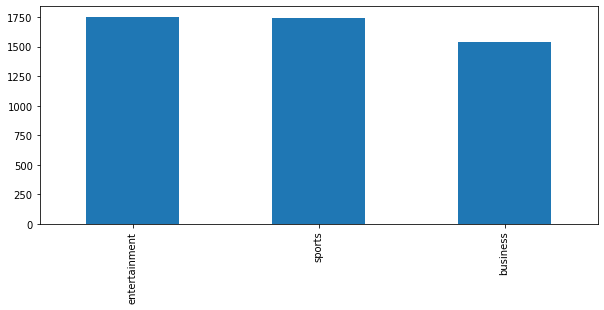

In [ ]:
my_tags = ['sports','entertainment','business']
plt.figure(figsize=(10,4))
data.label.value_counts().plot(kind='bar');

**Three labels are there - Entertainmnet,sports,business**

**There are 5036 total number of datas present and the labelling of them is somewhat equual among 3 classes**

In [ ]:
#Converting the dataframe into list
headings = data['headings'].tolist()
genere = data['label'].tolist()

corpus = []
for i in range(len(headings)):
    corpus.append(word_tokenize(headings[i]))

In [ ]:
corpus

[['കൊച്ചി',
  'ചെരുപ്പ്',
  'വിതരണ',
  'കേന്ദ്രത്തിലെ',
  'തീപിടിത്തം',
  ';',
  'അന്വേഷണം',
  'തുടങ്ങി',
  ',',
  'അട്ടിമറി',
  'സാധ്യതയും',
  'പരിശോധിക്കുന്നു'],
 ['ഈ\u200b\u200b\u200bസ്റ്റേ\u200b\u200b\u200bണ്\u200d',
  'ക\u200b\u200b\u200bറി',
  'പൗ\u200b\u200b\u200bഡ\u200b\u200b\u200bറി\u200b\u200b\u200bന്',
  'പു\u200b\u200b\u200bര\u200b\u200b\u200bസ്കാ\u200b\u200b\u200bരം',
  ';',
  'സം\u200b\u200b\u200bസ്ഥാ\u200b\u200b\u200bന',
  'മ\u200b\u200b\u200bലി\u200b\u200b\u200bനീ\u200b\u200b\u200bക\u200b\u200b\u200bര\u200b\u200b\u200bണ',
  'നി\u200b\u200b\u200bയ\u200b\u200b\u200bന്ത്ര\u200b\u200b\u200bണ',
  'ബോ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bഡി\u200b\u200b\u200bന്\u200dറെ',
  'അവാര്\u200dഡ്',
  'പ\u200b\u200b\u200bരി\u200b\u200b\u200bസ്ഥി\u200b\u200b\u200bതി',
  'സൗ\u200b\u200b\u200bഹൃ\u200b\u200b\u200bദ',
  'പ്ര\u200b\u200b\u200bവ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bത്ത\u200b\u200b\u200bന\u200b\u200b\u200bരീ\u200b\u200b\u200bതി\u200b\u200b\u200bകള്\u200d',
  'നടപ്പാ

In [ ]:
print(headings)

['കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം; അന്വേഷണം തുടങ്ങി, അട്ടിമറി സാധ്യതയും പരിശോധിക്കുന്നു', 'ഈ\u200b\u200b\u200bസ്റ്റേ\u200b\u200b\u200bണ്\u200d ക\u200b\u200b\u200bറി പൗ\u200b\u200b\u200bഡ\u200b\u200b\u200bറി\u200b\u200b\u200bന് പു\u200b\u200b\u200bര\u200b\u200b\u200bസ്കാ\u200b\u200b\u200bരം; സം\u200b\u200b\u200bസ്ഥാ\u200b\u200b\u200bന മ\u200b\u200b\u200bലി\u200b\u200b\u200bനീ\u200b\u200b\u200bക\u200b\u200b\u200bര\u200b\u200b\u200bണ നി\u200b\u200b\u200bയ\u200b\u200b\u200bന്ത്ര\u200b\u200b\u200bണ ബോ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bഡി\u200b\u200b\u200bന്\u200dറെ അവാര്\u200dഡ് പ\u200b\u200b\u200bരി\u200b\u200b\u200bസ്ഥി\u200b\u200b\u200bതി സൗ\u200b\u200b\u200bഹൃ\u200b\u200b\u200bദ പ്ര\u200b\u200b\u200bവ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bത്ത\u200b\u200b\u200bന\u200b\u200b\u200bരീ\u200b\u200b\u200bതി\u200b\u200b\u200bകള്\u200d നടപ്പാക്കിയതിനുള്ള അംഗീകാരമായി', 'ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്\u200dവലിച്ചു', 'റയല്\u200d മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീ

In [ ]:
print(genere)

['business', 'business', 'sports', 'sports', 'entertainment', 'entertainment', 'entertainment', 'business', 'business', 'entertainment', 'entertainment', 'sports', 'business', 'sports', 'sports', 'sports', 'sports', 'sports', 'business', 'business', 'entertainment', 'sports', 'entertainment', 'entertainment', 'sports', 'business', 'sports', 'entertainment', 'business', 'sports', 'sports', 'sports', 'sports', 'sports', 'business', 'sports', 'entertainment', 'sports', 'entertainment', 'entertainment', 'sports', 'entertainment', 'business', 'sports', 'sports', 'entertainment', 'sports', 'business', 'entertainment', 'entertainment', 'sports', 'entertainment', 'sports', 'entertainment', 'sports', 'business', 'entertainment', 'sports', 'business', 'business', 'entertainment', 'entertainment', 'sports', 'business', 'business', 'entertainment', 'business', 'entertainment', 'business', 'entertainment', 'entertainment', 'sports', 'business', 'business', 'entertainment', 'business', 'entertainmen

**Tokenization**

In [ ]:
#Tokenization
max_features = 2000 #number of words to keep. 
#2000 is the number of unique words in the corpus.
tokenizer = Tokenizer(nb_words=max_features, split=' ')
tokenizer.fit_on_texts(data['headings'].values)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
#Unique words and and their count
tokenizer.word_counts

OrderedDict([('കൊച്ചി', 6),
             ('ചെരുപ്പ്', 1),
             ('വിതരണ', 5),
             ('കേന്ദ്രത്തിലെ', 1),
             ('തീപിടിത്തം', 1),
             ('അന്വേഷണം', 6),
             ('തുടങ്ങി', 41),
             ('അട്ടിമറി', 3),
             ('സാധ്യതയും', 1),
             ('പരിശോധിക്കുന്നു', 1),
             ('ഈ\u200b\u200b\u200bസ്റ്റേ\u200b\u200b\u200bണ്\u200d', 1),
             ('ക\u200b\u200b\u200bറി', 1),
             ('പൗ\u200b\u200b\u200bഡ\u200b\u200b\u200bറി\u200b\u200b\u200bന്',
              1),
             ('പു\u200b\u200b\u200bര\u200b\u200b\u200bസ്കാ\u200b\u200b\u200bരം',
              1),
             ('സം\u200b\u200b\u200bസ്ഥാ\u200b\u200b\u200bന', 1),
             ('മ\u200b\u200b\u200bലി\u200b\u200b\u200bനീ\u200b\u200b\u200bക\u200b\u200b\u200bര\u200b\u200b\u200bണ',
              1),
             ('നി\u200b\u200b\u200bയ\u200b\u200b\u200bന്ത്ര\u200b\u200b\u200bണ',
              1),
             ('ബോ\u200b\u200b\u200bര്\u200d\u200b\u200b\u200bഡി\u200b\u200b\u200

**Creating the input data**

In [ ]:
X = tokenizer.texts_to_sequences(data['headings'].values)
X = pad_sequences(X, padding = 'post') #Zero padding at the end of the sequence

In [ ]:
labels = data['label'].tolist()
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [ ]:
Y = to_categorical(Y)
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
#Splitting the data into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print("Shape train data = ",np.shape(X_train))
print("Shape of train label = ",np.shape(Y_train))
print("Shape of test data = ",np.shape(X_test))
print("Shape of test label = ",np.shape(Y_test))

Shape train data =  (4028, 26)
Shape of train label =  (4028, 3)
Shape of test data =  (1008, 26)
Shape of test label =  (1008, 3)


**ARCHITECTURE**

In [ ]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size

14197

In [ ]:
embed_dim = 1000
hidden_layer = 50

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(SimpleRNN(hidden_layer))
model.add(Dense(25))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 1000)          2000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 1000)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                52550     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 78        
Total params: 2,053,903
Trainable params: 2,053,903
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train,Y_train,epochs = 20, batch_size = 32)

Epoch 1/20
126/126 [==============================] - 6s 48ms/step - loss: 0.7780 - accuracy: 0.6435
Epoch 2/20
126/126 [==============================] - 6s 47ms/step - loss: 0.2782 - accuracy: 0.9042
Epoch 3/20
126/126 [==============================] - 6s 48ms/step - loss: 0.1638 - accuracy: 0.9402
Epoch 4/20
126/126 [==============================] - 6s 48ms/step - loss: 0.1223 - accuracy: 0.9536
Epoch 5/20
126/126 [==============================] - 6s 48ms/step - loss: 0.0962 - accuracy: 0.9580
Epoch 6/20
126/126 [==============================] - 6s 47ms/step - loss: 0.1015 - accuracy: 0.9588
Epoch 7/20
126/126 [==============================] - 6s 47ms/step - loss: 0.1138 - accuracy: 0.9556
Epoch 8/20
126/126 [==============================] - 6s 47ms/step - loss: 0.0899 - accuracy: 0.9630
Epoch 9/20
126/126 [==============================] - 6s 48ms/step - loss: 0.0924 - accuracy: 0.9585
Epoch 10/20
126/126 [==============================] - 6s 47ms/step - loss: 0.0901 - accura

**Validation Accuracy**

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 1, batch_size = 32)
print("Accuracy: %.2f" % (score[1]*100))

32/32 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.8522
Accuracy: 85.22


**Loading the test data**

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/S3/NLP/CONTEST/malayalam_news_test.csv')

In [ ]:
test.head()

,ID,headings
0,MAL_0001,അന്താരാഷ്ട്ര ഇന്റര്‍നെറ്റ് സേവനം താല്‍ക്കാലികമ...
1,MAL_0002,"മഞ്ഞ് ചതിച്ചാശാനേ!!!!, ഹാന്നോവറിന്റെ പ്രതീക്ഷക..."
2,MAL_0003,"12 സീസണ്‍ എട്ടു ചാമ്ബ്യന്മാര്‍, പ്രവചിക്കാന്‍ ..."
3,MAL_0004,\nമുംബൈ സിറ്റിയോടു തോറ്റിട്ടും യോഗ്യത നേടി ഗോവ...
4,MAL_0005,മദ്യപിച്ചെത്തിയ നടന്മാര്‍ തമ്മില്‍ കയ്യാങ്കളി;...


**Analysing test data**

In [ ]:
test['headings']

0       അന്താരാഷ്ട്ര ഇന്റര്‍നെറ്റ് സേവനം താല്‍ക്കാലികമ...
1       മഞ്ഞ് ചതിച്ചാശാനേ!!!!, ഹാന്നോവറിന്റെ പ്രതീക്ഷക...
2       12 സീസണ്‍ എട്ടു ചാമ്ബ്യന്മാര്‍, പ്രവചിക്കാന്‍ ...
3       \nമുംബൈ സിറ്റിയോടു തോറ്റിട്ടും യോഗ്യത നേടി ഗോവ...
4       മദ്യപിച്ചെത്തിയ നടന്മാര്‍ തമ്മില്‍ കയ്യാങ്കളി;...
                              ...                        
1255    സാക്ഷാല്‍ വിരാട് കോഹ്ലിയെ പോലും ഞെട്ടിച്ച്‌ ജസ...
1256    ചാമ്ബ്യന്‍സ് ലീഗ്; ബയേണിനെ തകര്‍ത്ത് ലിവര്‍പൂള...
1257    20 രൂപയുടെ നാണയമിറക്കാന്‍ കേന്ദ്ര ധനകാര്യ മന്ത...
1258    ഇന്ത്യന്‍ സമ്ബദ് വ്യവസ്ഥ 7.3 ശതമാനം വളര്‍ച്ച ന...
1259    വൈ ദിസ് കൊലച്ചതി? ഒറ്റ രാത്രികൊണ്ട് ലക്ഷക്കണക്...
Name: headings, Length: 1260, dtype: object

In [ ]:
test['ID']

0       MAL_0001
1       MAL_0002
2       MAL_0003
3       MAL_0004
4       MAL_0005
          ...   
1255    MAL_1256
1256    MAL_1257
1257    MAL_1258
1258    MAL_1259
1259    MAL_1260
Name: ID, Length: 1260, dtype: object

In [ ]:
test = tokenizer.texts_to_sequences(test['headings'].values)
test = pad_sequences(test, padding = 'post')

In [ ]:
class_label = model.predict_classes(test)
print(le.inverse_transform(class_label))

['sports' 'entertainment' 'entertainment' ... 'entertainment' 'sports'
 'entertainment']


In [ ]:
pred_labels=le.inverse_transform(class_label)
print(pred_labels)

['sports' 'entertainment' 'entertainment' ... 'entertainment' 'sports'
 'entertainment']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/S3/NLP/CONTEST/ROLLNO_Task_1_submission.csv')
df.head()

,ID,Predicted labels
0,MAL_0001,NaN
1,MAL_0002,NaN
2,MAL_0003,NaN
3,MAL_0004,NaN
4,MAL_0005,NaN


In [ ]:
df['Predicted labels']=pred_labels

In [ ]:
pred_labels

array(['sports', 'entertainment', 'entertainment', ..., 'entertainment',
       'sports', 'entertainment'], dtype='<U13')

In [ ]:
df.to_csv(r'/content/drive/MyDrive/S3/NLP/CONTEST/pred_1.csv', index=False)

In [ ]:
view = pd.read_csv('/content/drive/MyDrive/S3/NLP/CONTEST/pred_1.csv')

In [ ]:
view.head()

,ID,Predicted labels
0,MAL_0001,entertainment
1,MAL_0002,entertainment
2,MAL_0003,business
3,MAL_0004,business
4,MAL_0005,sports


In [ ]:
len(view)

1260